In [1]:
import pandas as pd
import numpy as np

# Diseño Experimental Factorial en Bloques

In [75]:
data_frame1 = pd.DataFrame({
    "A1": [-1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1],
    "B1": [-1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1],
    "C1": [-1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1],
    "D1": [-1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1],
    "y": [25, 71, 48, 68, 43, 45, 40, 60, 80, 25, 55, 65, 70, 86, 104, 76]
})

display(data_frame1)

,A1,B1,C1,D1,y
0,-1,-1,-1,-1,25
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,-1,-1,1,-1,68
4,-1,-1,-1,1,43
5,1,1,-1,-1,45
6,1,-1,1,-1,40
7,-1,1,1,-1,60
8,1,-1,-1,1,80
9,-1,1,-1,1,25


> Demuestre que a partir del contraste el efecto \(ABCD\) se confunde con los bloques generados.

Por construcción, en un diseño donde el contraste generador es 
$$
L = x_A + x_B + x_C + x_D
$$
Se define como que los valores de ABCD definen un bloque, de esta forma tenemos la siguiente matriz:
| Run  | A  | B  | AB | C  | AC | BC | ABC | D  | AD | BD | ABD | CD | ACD | BCD | ABCD |Block
|------|----|----|----|----|----|----|-----|----|----|----|-----|----|-----|-----|------|-----|
| (1)  | -1 | -1 | +1 | -1 | +1 | +1 | -1  | -1 | +1 | +1 | -1  | +1 | -1  | -1  | +1   |1    |
| a    | +1 | -1 | -1 | -1 | -1 | +1 | +1  | -1 | -1 | +1 | +1  | +1 | +1  | -1  | -1   |2    |
| b    | -1 | +1 | -1 | -1 | +1 | -1 | +1  | -1 | +1 | -1 | +1  | +1 | -1  | +1  | -1   |2    |
| ab   | +1 | +1 | +1 | -1 | -1 | -1 | -1  | -1 | -1 | -1 | -1  | +1 | +1  | +1  | +1   |1    |
| c    | -1 | -1 | +1 | +1 | -1 | -1 | +1  | -1 | +1 | +1 | -1  | -1 | +1  | +1  | -1   |2    |
| ac   | +1 | -1 | -1 | +1 | +1 | -1 | -1  | -1 | -1 | +1 | +1  | -1 | -1  | +1  | +1   |1    |
| bc   | -1 | +1 | -1 | +1 | -1 | +1 | -1  | -1 | +1 | -1 | +1  | -1 | +1  | -1  | +1   |1    |
| abc  | +1 | +1 | +1 | +1 | +1 | +1 | +1  | -1 | -1 | -1 | -1  | -1 | -1  | -1  | -1   |2    |
| d    | -1 | -1 | +1 | -1 | +1 | +1 | -1  | +1 | -1 | +1 | -1  | +1 | -1  | +1  | -1   |2    |
| ad   | +1 | -1 | -1 | -1 | -1 | +1 | +1  | +1 | +1 | -1 | -1  | -1 | -1  | +1  | +1   |1    |
| bd   | -1 | +1 | -1 | -1 | +1 | -1 | +1  | +1 | -1 | -1 | +1  | -1 | +1  | -1  | +1   |1    |
| abd  | +1 | +1 | +1 | -1 | -1 | -1 | -1  | +1 | +1 | +1 | +1  | -1 | -1  | -1  | -1   |2    |
| cd   | -1 | -1 | +1 | +1 | -1 | -1 | +1  | +1 | -1 | +1 | -1  | +1 | +1  | -1  | +1   |1    |
| acd  | +1 | -1 | -1 | +1 | +1 | -1 | -1  | +1 | +1 | -1 | -1  | +1 | +1  | -1  | -1   |2    |
| bcd  | -1 | +1 | -1 | +1 | -1 | +1 | -1  | +1 | -1 | -1 | +1  | +1 | -1  | +1  | -1   |2    |
| abcd | +1 | +1 | +1 | +1 | +1 | +1 | +1  | +1 | +1 | +1 | +1  | +1 | +1  | +1  | +1   |1    |

Podemos ver que el bloque toma los valores de ABCD, por lo cuál el efecto que tengan ambos no puede ser separados, esto se denomina que las variables están "confundidas". ¿Por qué es una buena elección realizar el bloqueo por medio de la variable de mayor orden de interacción?

## Efecto del Bloqueo

> Estime el efecto del bloqueo generado por el contraste. Interprete su magnitud en relación a la variabilidad experimental.

In [239]:
data_frame1['Block'] = data_frame1['A1'] * data_frame1['B1'] * data_frame1['C1'] * data_frame1['D1'] 
data_frame1['Block'] = data_frame1['Block'].apply(lambda x: 0 if x == -1 else 1)


El efecto del bloque se cálcula mediante:
$$
\text{Block Effect} = \overline{y}_{B1} + \overline{y}_{B2}
$$
Donde 

In [240]:
block_effect = data_frame1[data_frame1['Block'] == 1]['y'].mean() - data_frame1[data_frame1['Block'] == 0]['y'].mean()
print(f"Block Effect: {block_effect}")

SS_block = ((data_frame1[data_frame1['Block'] == 1]['y'].sum())**2 + (data_frame1[data_frame1['Block'] == 0]['y'].sum()) ** 2 )/8 \
    - ((data_frame1['y'].sum())**2)/16
print(f"SS Block: {SS_block}")

Total_SS = np.sum(data_frame1['y']**2) - (data_frame1['y'].sum()**2) / len(data_frame1)
print(f"Total SS: {Total_SS}")
percetange = SS_block / Total_SS * 100
print(f"Percentage of Total SS explained by Block: {percetange:.2f}%")

Block Effect: -18.625
SS Block: 1387.5625
Total SS: 7110.9375
Percentage of Total SS explained by Block: 19.51%


## Estimación de Efectos y Regresión Lineal

>  Mediante regresión lineal, estime los efectos de cada uno de los factores principales e interacciones significativas. ¿Cuál(es) parecen relevantes?

In [241]:
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
model = ols('y ~ A1 * B1 * C1 * D1 - A1:B1:C1:D1', data=data_frame1).fit()
print(model.summary())
# precuación con los valores-t debido a que al estar 
# construido el modelo con interacciones, los valores-t no son confiables



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                 -1.927
Method:                 Least Squares   F-statistic:                    0.2946
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.913
Time:                        09:21:38   Log-Likelihood:                -58.405
No. Observations:                  16   AIC:                             146.8
Df Residuals:                       1   BIC:                             158.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0625      9.313      6.450      0.0

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


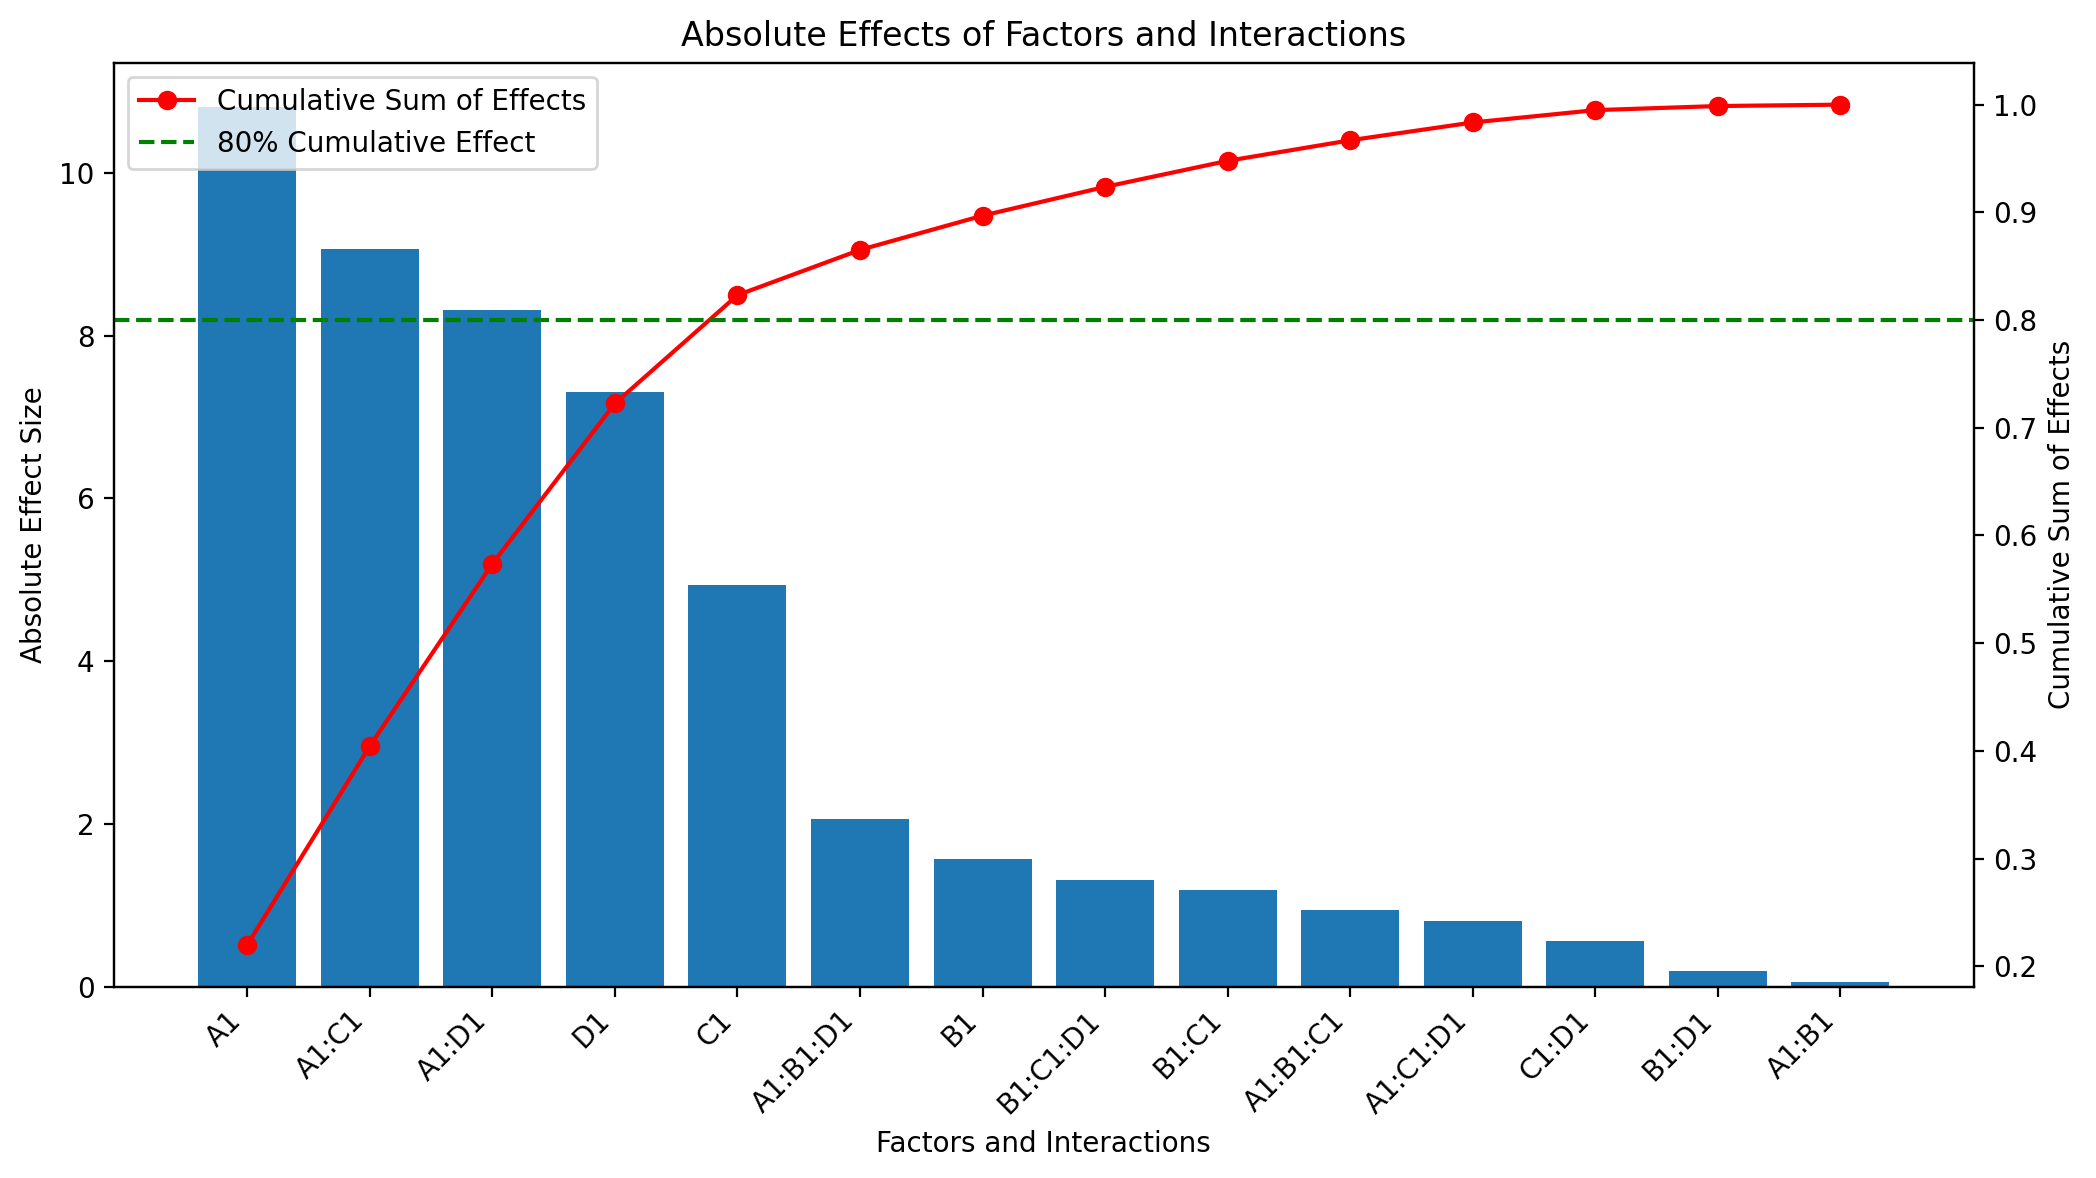

In [242]:
abs_parameters = np.abs(model.params)[1:].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6), dpi = 200)
total_effects = np.sum(abs_parameters)
ax.bar(range(len(abs_parameters)), abs_parameters, tick_label=abs_parameters.index)
ax.set_title('Absolute Effects of Factors and Interactions')
ax.set_ylabel('Absolute Effect Size')
ax.set_xlabel('Factors and Interactions')
ax.set_xticklabels(abs_parameters.index, rotation=45, ha='right')
cum_sum_effects = np.cumsum(abs_parameters)
ax2 = ax.twinx()
ax2.set_ylabel('Cumulative Sum of Effects')
ax2.plot(range(len(abs_parameters)), cum_sum_effects/total_effects, color='red', marker='o', label='Cumulative Sum of Effects')
ax2.axhline(y=0.8, color='green', linestyle='--', label='80% Cumulative Effect')
plt.legend()
plt.show()
# The code above calculates the block effect, sum of squares for the block, total sum of squares,

## Selección de parámetros

>¿Es posible reducir la cantidad de factores en su modelo? Justifique mediante criterios estadísticos. Genere la nueva estimación del modelo reducido.

Desde el gráfico de Pareto, podemos concluir que se pueden escoger A, C y D como variables explicativas para el modelo. 

In [243]:
from statsmodels.stats.anova import anova_lm
ols_red = ols('y ~ A1 + D1 + C1 + A1:C1 + A1:D1 + (Block)', data=data_frame1).fit()
print(ols_red.summary())
display(anova_lm(ols_red, typ=2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     55.37
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.35e-06
Time:                        09:21:40   Log-Likelihood:                -42.395
No. Observations:                  16   AIC:                             98.79
Df Residuals:                       9   BIC:                             104.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.3750      1.614     42.983      0.0

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


,sum_sq,df,F,PR(>F)
A1,1870.5625,1.0,89.757081,0.000006
D1,855.5625,1.0,41.053316,0.000124
C1,390.0625,1.0,18.716761,0.001915
A1:C1,1314.0625,1.0,63.053982,0.000023
A1:D1,1105.5625,1.0,53.049317,0.000046
Block,1387.5625,1.0,66.580806,0.000019
Residual,187.5625,9.0,NaN,NaN


# Diseño Experimental Factorial Fraccionado

In [142]:

df_fraccional_yield = pd.DataFrame({
    "A": [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1],
    "B": [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
    "C": [-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1],
    "D": [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    "E": [1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1],
    "Yield": [8, 9, 34, 52, 16, 22, 45, 60, 6, 10, 30, 50, 15, 21, 44, 63]
})

display(df_fraccional_yield)




,A,B,C,D,E,Yield
0,-1,-1,-1,-1,1,8
1,1,-1,-1,-1,-1,9
2,-1,1,-1,-1,-1,34
3,1,1,-1,-1,1,52
4,-1,-1,1,-1,-1,16
5,1,-1,1,-1,1,22
6,-1,1,1,-1,1,45
7,1,1,1,-1,-1,60
8,-1,-1,-1,1,-1,6
9,1,-1,-1,1,1,10


## Generación de Alias y Resolución

> Determine el alias completo para cada uno de los factores. ¿Qué significa que el diseño tenga resolución V? ¿Qué tipos de efectos pueden interpretarse sin ambigüedad?

El sistema está generado por el generador I = ABCDE. De esta forma, los aliaces se generan de la siguiente manera:
1. E = ABCD
2. A = A * ABCDE = BCDE
3. B = B * ABCDE = ACDE
4. ABE = ABE * ABCDE = CD 
5. 
Y así sucesivamente. Lo que condiciona que cada factor principal no tenga un alias con otro ni de interacción de segundo orden, y lo mismo para las interacciones de segundo orden. De esta manera, este diseño posee una resolución V. Por lo cuál, es posible estimar los efectos de primer orden y de interacciones de segundo orden sin ambigüedad, siguiendo el principio de disperción de efectos.


## Estimación de Efecto en Diseño Factorial Fraccionado

> Estime el efecto de cada tratamiento mediante una regresión lineal. Aplique una selección de variables e identifique cuáles parecen significativos. ¿Qué efecto se está estimando con la regresión lineal?"

In [145]:
# Funciones auxliares para generar las fórmulas de los modelos
from itertools import combinations
def FirstOformula(*X):
    '''
    Pure First Order
    '''
    X = '+'.join(X)
    return X


def SecondOformula(*X):
    '''
    Pure Second Order
    '''
    X = '+'.join([f'np.power({x}, 2)' for x in X])
    return X

def TWIformula(*X):
    '''
    Two-way Interaction
    '''
    X_aux = []
    for i, j in combinations(range(len(X)), 2):
        X_aux.append(X[i] + ':' + X[j])
    X = '+'.join(X_aux)
    return X

formula_model = 'Yield ~ ' + FirstOformula('A', 'B', 'C', 'D', 'E') + '+' + \
    TWIformula('A', 'B', 'C', 'D', 'E')
    
print(f"Formula for the model: {formula_model}")

model_fraccional = ols(formula_model, data=df_fraccional_yield).fit()
print(model_fraccional.summary())


Formula for the model: Yield ~ A+B+C+D+E+A:B+A:C+A:D+A:E+B:C+B:D+B:E+C:D+C:E+D:E
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 04 Jun 2025   Prob (F-statistic):                nan
Time:                        01:36:41   Log-Likelihood:                 484.70
No. Observations:                  16   AIC:                            -937.4
Df Residuals:                       0   BIC:                            -925.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/s

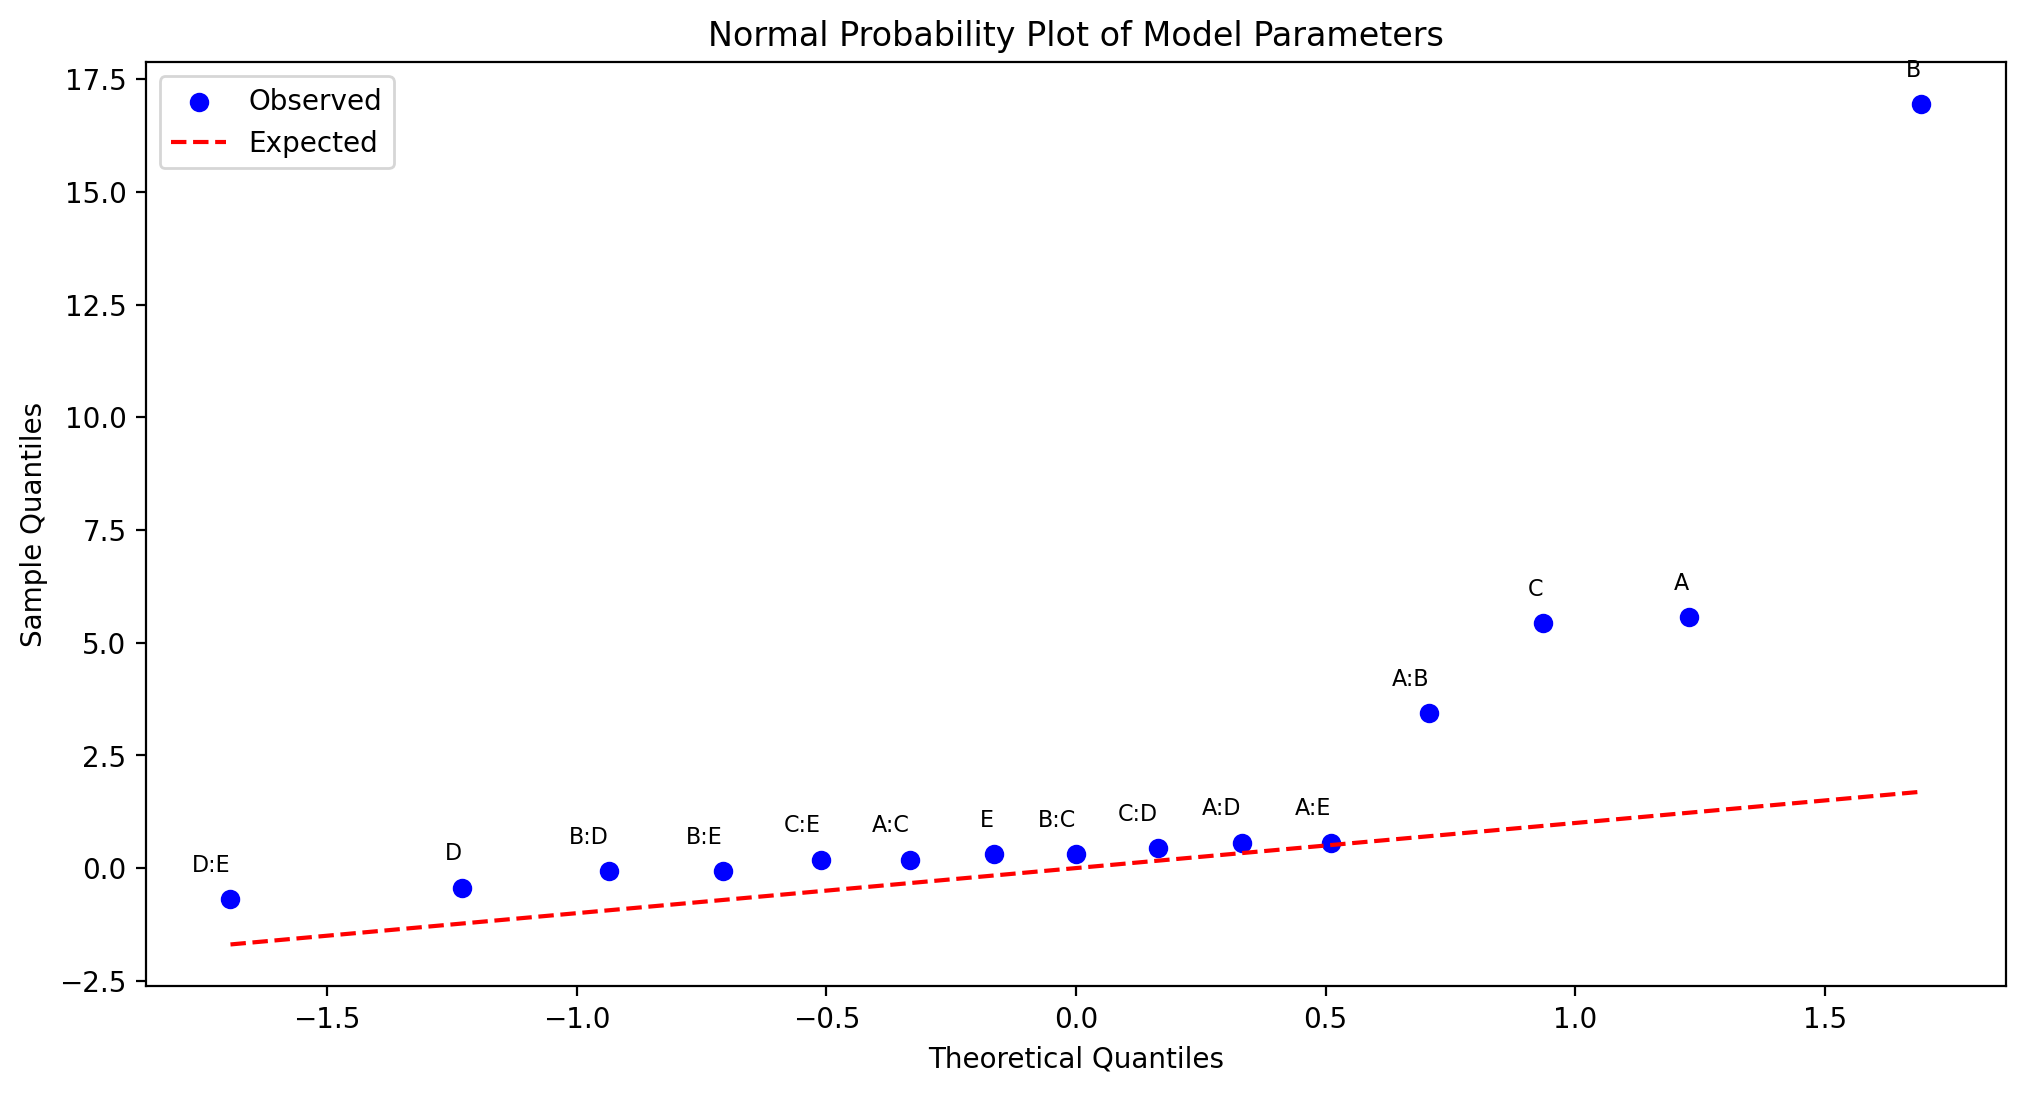

In [ ]:
params = model_fraccional.params[1:].sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
(osm, osr), _ = stats.probplot(params, dist="norm")
ax.scatter(osm, osr, color='blue', label='Observed')
ax.plot(osm, osm, color='red', linestyle='--', label='Expected')

for i, txt in enumerate(params.index):
    ax.annotate(txt, (osm[i], osr[i]+0.5), fontsize=8, ha='right', va='bottom')
ax.set_title('Normal Probability Plot of Model Parameters')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.legend()

A partir del normality-plot podemos darnos cuenta que aquellos valores que son significativos son `B, A, C, A:B`.

In [160]:
model_red = ols('Yield ~ A + B + C + A:B', data=df_fraccional_yield).fit()
print(model_red.summary())
display(anova_lm(model_red, typ=2))

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     560.7
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.25e-12
Time:                        01:56:04   Log-Likelihood:                -27.233
No. Observations:                  16   AIC:                             64.47
Df Residuals:                      11   BIC:                             68.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.3125      0.400     75.744      0.0

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


,sum_sq,df,F,PR(>F)
A,495.0625,1.0,193.195122,2.534760e-08
B,4590.0625,1.0,1791.243902,1.560258e-13
C,473.0625,1.0,184.609756,3.213624e-08
A:B,189.0625,1.0,73.780488,3.301648e-06
Residual,28.1875,11.0,NaN,NaN


## Evaluación ANOVA

> Realice un análisis ANOVA para el modelo reducido. Evalúe los supuestos (normalidad, homocedasticidad, independencia) mediante gráficos y tests. ¿El modelo es adecuado?

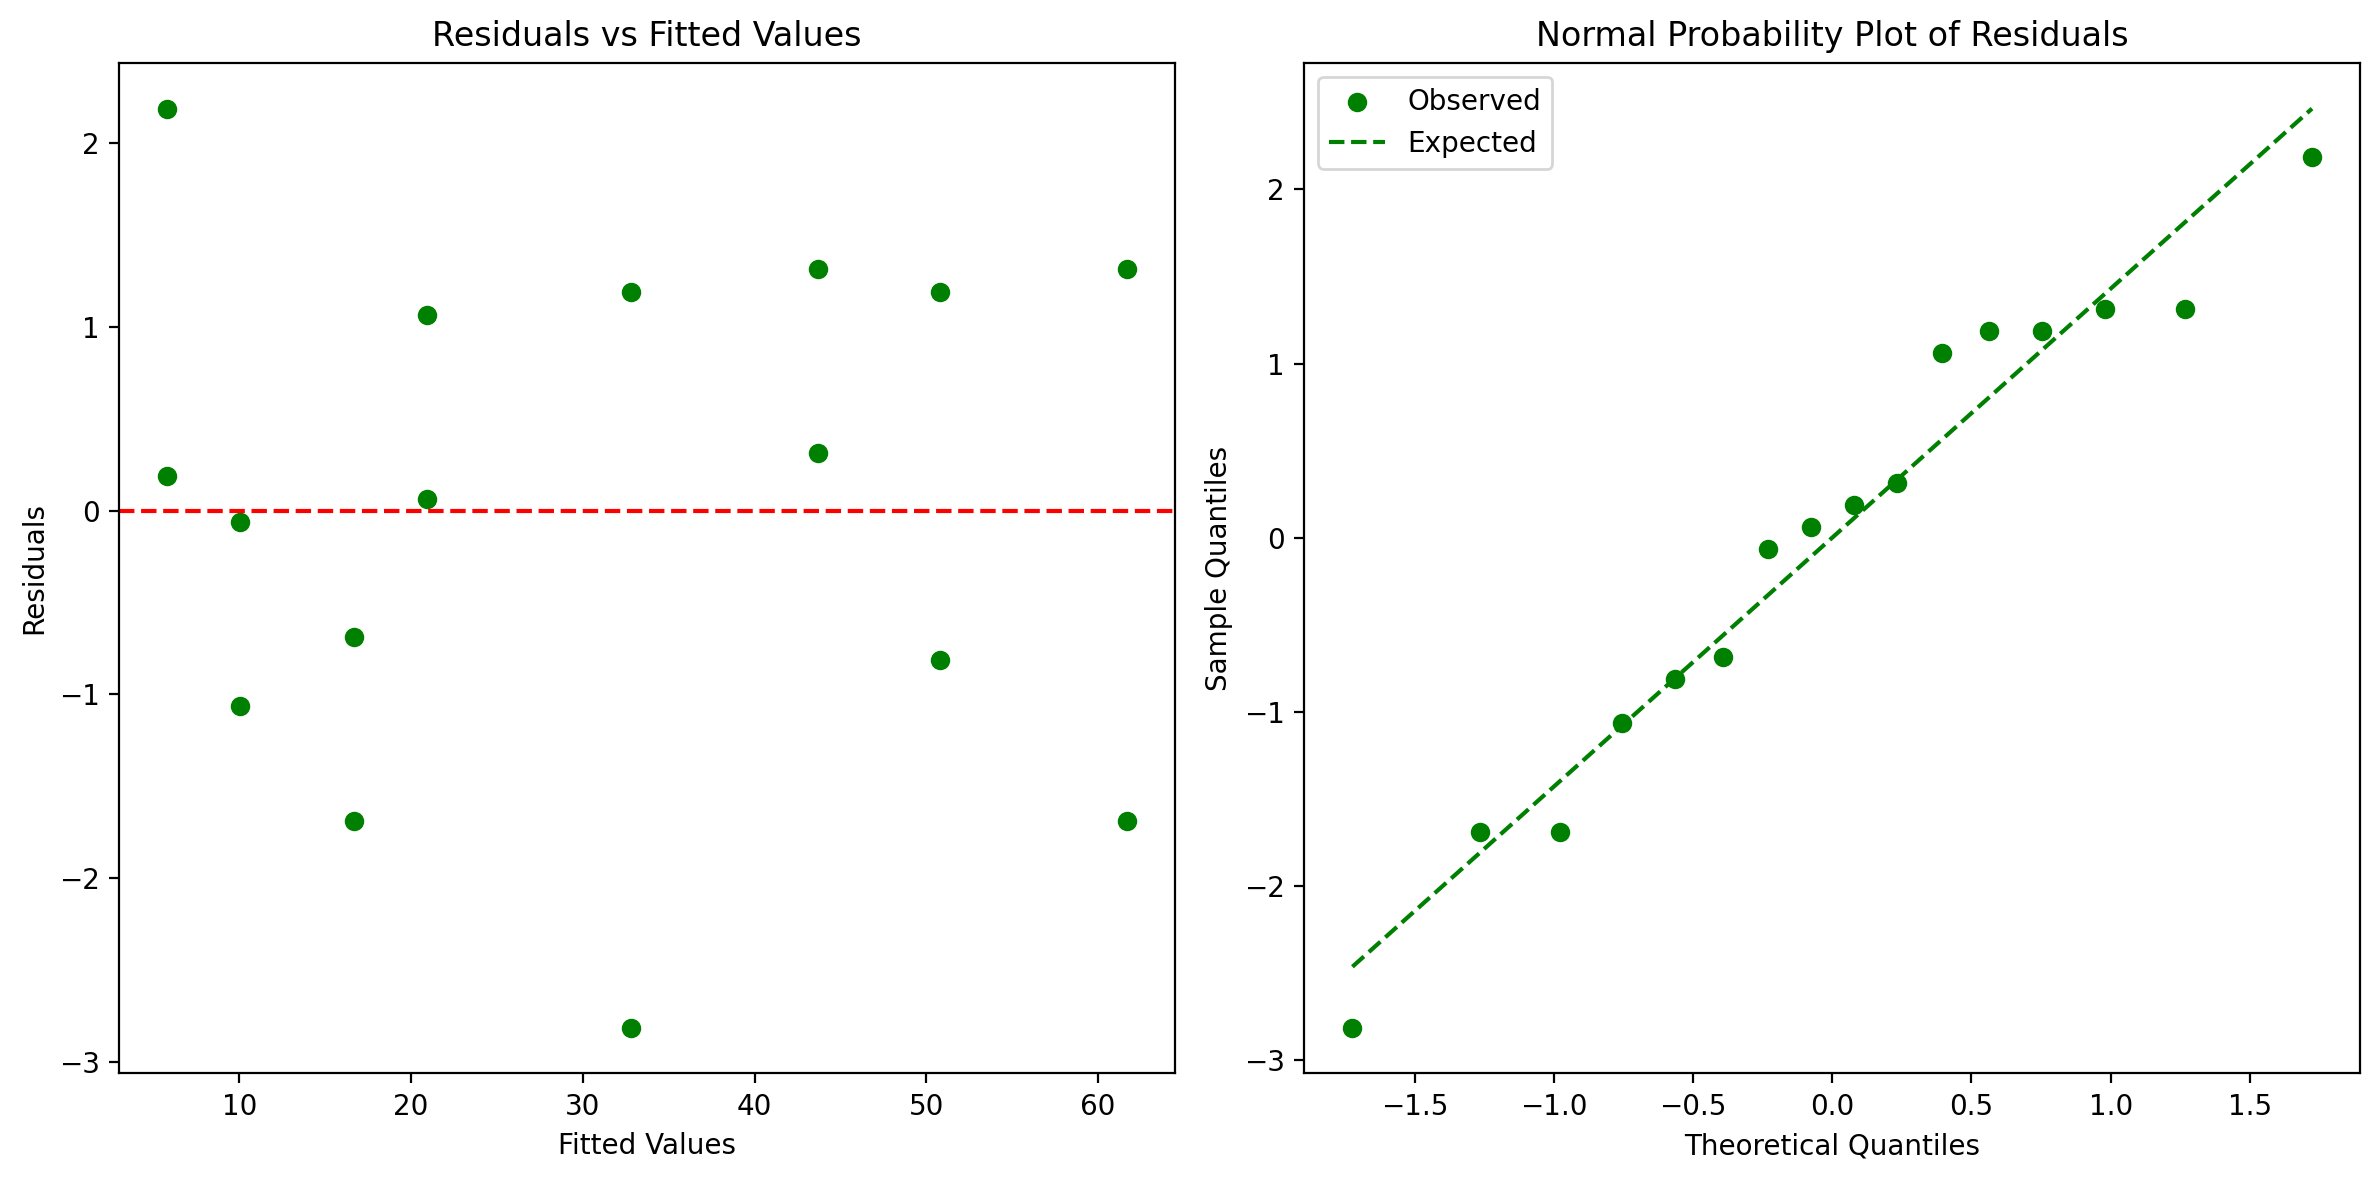

In [165]:
resi = model_red.resid
fig, ax = plt.subplots(1,2 ,figsize=(12, 6), dpi=200)

ax[0].scatter(model_red.fittedvalues, resi, color='green')
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Residuals vs Fitted Values')
ax[0].set_xlabel('Fitted Values')

ax[0].set_ylabel('Residuals')
(osm, osr), (slope, intercept, r) = stats.probplot(resi, dist="norm")

ax[1].scatter(osm, osr, color='green', label='Observed')
ax[1].plot(osm, osm*slope + intercept, color='green', linestyle='--', label='Expected')
ax[1].set_title('Normal Probability Plot of Residuals')
ax[1].set_xlabel('Theoretical Quantiles')
ax[1].set_ylabel('Sample Quantiles')
ax[1].legend()
plt.tight_layout()
plt.show()


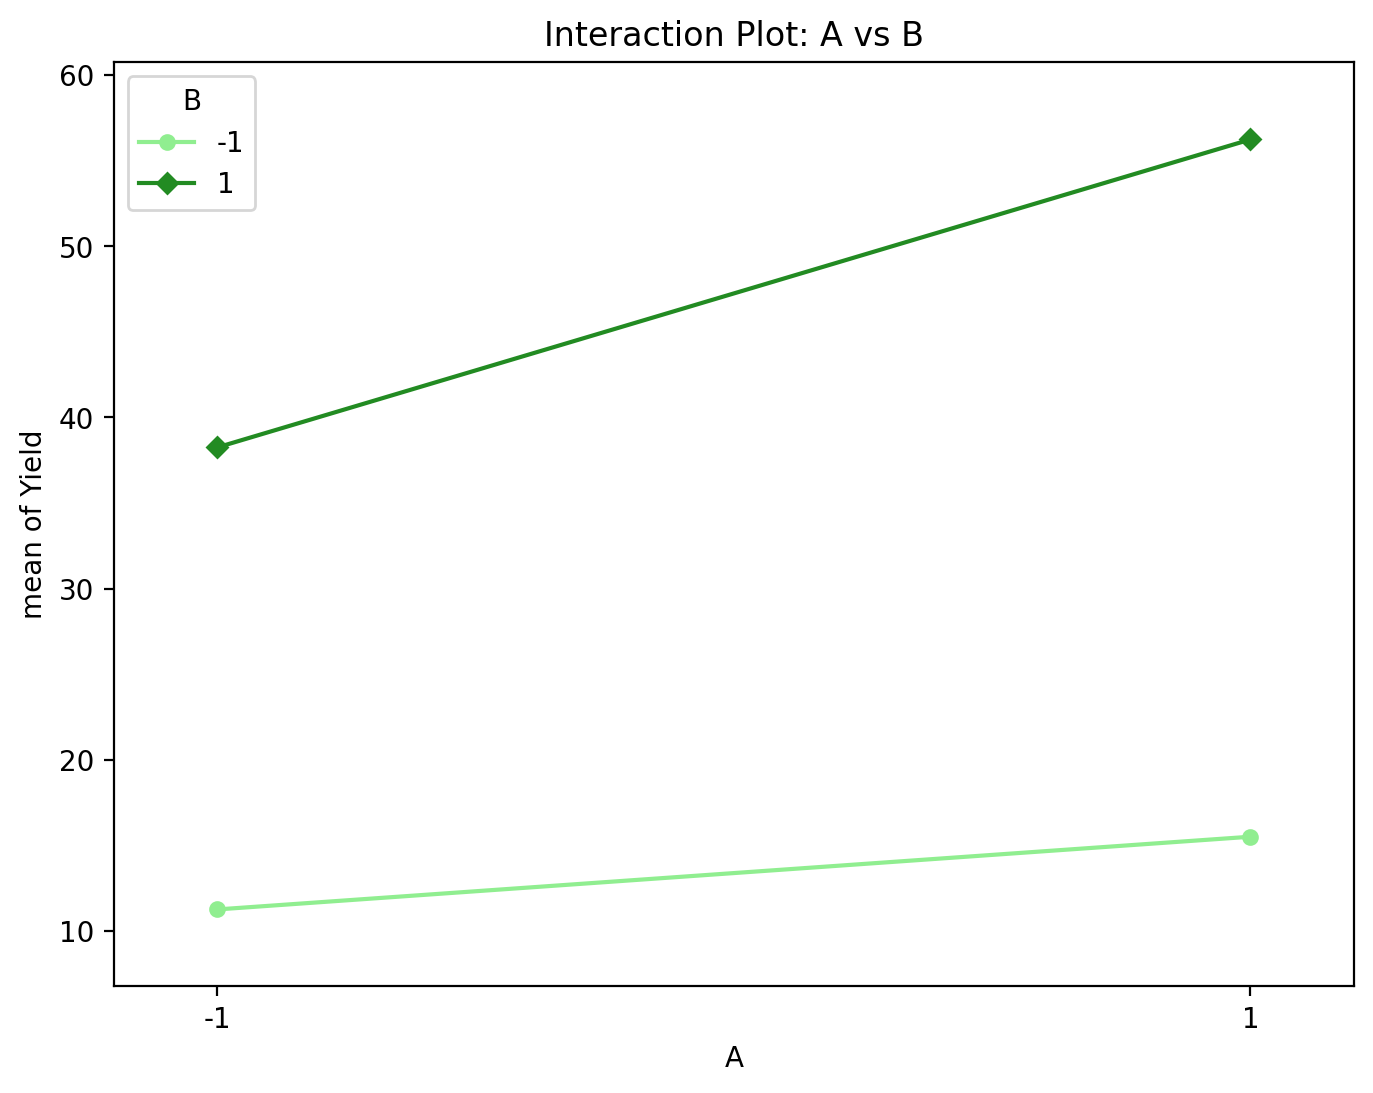

In [181]:
# interactions AB
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
interaction_plot(df_fraccional_yield['A'], df_fraccional_yield['B'], df_fraccional_yield['Yield'],
                 colors = ['lightgreen', 'forestgreen'], 
                 markers = ['o', 'D'], ms = 5, xlabel='A', ylabel='Yield', ax = ax)

ax.set_title('Interaction Plot: A vs B')
plt.xticks(ticks=[-1, 1], labels=['-1', '1'])
plt.show()

# Diseño Experimental basado en Superficie de Respuesta: Diseños Central Composite Design

In [244]:
df_respuesta = pd.DataFrame({
    "xi1": [80.00, 80.00, 90.00, 90.00, 85.00, 85.00, 85.00, 85.00, 85.00, 92.07, 77.93, 85.00, 85.00],
    "xi2": [170.00, 180.00, 170.00, 180.00, 175.00, 175.00, 175.00, 175.00, 175.00, 175.00, 175.00, 182.07, 167.93],
    "x1":  [-1.000, -1.000,  1.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.414, -1.414,  0.000,  0.000],
    "x2":  [-1.000,  1.000, -1.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.414, -1.414],
    "y":   [76.5, 77.0, 78.0, 79.5, 79.9, 80.3, 80.0, 79.7, 79.8, 78.4, 75.6, 78.5, 77.0]
})
display(df_respuesta)

,xi1,xi2,x1,x2,y
0,80.00,170.00,-1.000,-1.000,76.5
1,80.00,180.00,-1.000,1.000,77.0
2,90.00,170.00,1.000,-1.000,78.0
3,90.00,180.00,1.000,1.000,79.5
4,85.00,175.00,0.000,0.000,79.9
5,85.00,175.00,0.000,0.000,80.3
6,85.00,175.00,0.000,0.000,80.0
7,85.00,175.00,0.000,0.000,79.7
8,85.00,175.00,0.000,0.000,79.8
9,92.07,175.00,1.414,0.000,78.4


> Explique la utilidad de los puntos axiales y el rol de $\alpha = \sqrt[4]{2^k}$. ¿Qué permiten modelar estos puntos en una superficie de segundo orden?

En un diseño de superficie de respuesta CCD (Central Composite Design) permite encontrar relevancia de efectos de segundo orden. Para esto se utilizan una serie de puntos axiales, descritos por $\alpha = \sqrt[4]{2^k}$, los que permiten hacer rotable el sistema, es decir, la varianza es la misma en todas las direcciones. Esta es una propiedad deseable del sistema dado a que permite realizar estimaciones de forma precisa en todas las direcciones del diseño.


## Ajuste modelo Cuadrático

> Estime un modelo cuadrático incluyendo términos de primer orden, segundo orden e interacciones. Realice un ANOVA e interprete los efectos.

In [196]:
def FirstO(*X):
    '''
    Pure First Order
    '''
    X = [x.values for x in X]
    return np.concatenate([X], axis = 1).T

def SecondO(*X):
    '''
    Pure Second Order
    '''
    X_aux = [x.values**2 for x in X]
    X_aux = np.concatenate([X_aux], axis = 1).T
    # get unique item
    X_unique = np.unique(X_aux, axis = 1)
    return X_unique


def TWI(*X):
    '''
    Two-way Interaction
    '''
    X = [x.values for x in X]
    interaction_terms = []

    # Calculo de términos de interacción
    for i, j in combinations(range(len(X)), 2):
        interaction_terms.append(X[i] * X[j])
    return np.concatenate([interaction_terms], axis = 1).T

formula = 'y ~ '+ FirstOformula('x1', 'x2') + '+' + \
    SecondOformula('x1', 'x2') + '+' + TWIformula('x1', 'x2')
ols_res = ols(formula, data=df_respuesta).fit()
print(ols_res.summary())
display(anova_lm(ols_res, typ=2))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     79.67
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           5.15e-06
Time:                        02:43:26   Log-Likelihood:                 2.7787
No. Observations:                  13   AIC:                             6.443
Df Residuals:                       7   BIC:                             9.832
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          79.9400      0.119    6

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


,sum_sq,df,F,PR(>F)
x1,7.919804,1.0,111.687325,0.000015
x2,2.123151,1.0,29.941275,0.000934
"np.power(x1, 2)",13.174204,1.0,185.786365,0.000003
"np.power(x2, 2)",6.972100,1.0,98.322535,0.000023
x1:x2,0.250000,1.0,3.525571,0.102519
Residual,0.496373,7.0,NaN,NaN


Podemos ver a partir del modelo que la interacción es poco significativa.

## Lack-of-Fit Test

>  Realice un test de *lack-of-fit*. ¿Qué indica un $p\text{-value} > \alpha$?

El test de lack-of-fit posee una hipótesis nula que plantea que el modelo ajusta bien a los datos, mientras que la alternativa indica que no ocurre dicho caso.

In [190]:
def lack_of_fit_test(linear_model):

    anova_lm_test = anova_lm(linear_model, type = 'II')
    residual_df = anova_lm_test.at['Residual','df']
    residual_ss = anova_lm_test.at['Residual','sum_sq']

    # Sum of squares of pure error
    unique_level = []
    count_level = []
    exog_variables = linear_model.model.exog
    for index, point in enumerate(exog_variables):

        if list(point) not in unique_level:
            unique_level.append(list(point))
            count_level.append([1, [index], point])
        else:
            count_level[unique_level.index(list(point))][0] += 1
            count_level[unique_level.index(list(point))][1].append(index)
    # print([co_lev[1] for co_lev in count_level])
    SS_LOF = 0
    coefficients = linear_model.params.values
    endog_values = linear_model.model.endog
    for u_lev in unique_level:
        n_i, indexes, val = count_level[unique_level.index(u_lev)]
        if len(indexes) == 1:
            indexes = indexes[0]
            exog_index = indexes
        else:
            exog_index = indexes[0]
        y_is = endog_values[indexes]
        mean_y_is = np.mean(y_is)
        exog_values = exog_variables[exog_index]
        prediction = coefficients @ exog_values
        SS_LOF += n_i * (mean_y_is - prediction) ** 2

    ###

    SS_PE = residual_ss - SS_LOF
    m = len(unique_level)
    p = len(coefficients)
    n = len(exog_variables)
    F_val_lof = (SS_LOF/(m - p))/(SS_PE/(n-m))

    lack_of_fit_test
    ###

    ### Valor P prueba

    p_val_lof = 1 - stats.f.cdf(F_val_lof, m - p, n - m)
    df_results = pd.DataFrame(np.zeros([3,4]), columns = ['df', 'sum_sq', 'F', 'p-value'])
    df_results.index = ['Residuals', 'Pure Error', 'Lack of Fit']

    df_results.at['Residuals', 'df'] = residual_df
    df_results.at['Residuals', 'sum_sq'] = residual_ss
    df_results.at['Residuals', 'F'] = np.nan
    df_results.at['Residuals', 'p-value'] = np.nan
    df_results.at['Pure Error', 'df'] = m - p
    df_results.at['Pure Error', 'sum_sq'] = SS_LOF
    df_results.at['Pure Error', 'F'] = np.nan
    df_results.at['Pure Error', 'p-value'] = np.nan
    df_results.at['Lack of Fit', 'df'] = n - m
    df_results.at['Lack of Fit', 'sum_sq'] = SS_PE
    df_results.at['Lack of Fit', 'F'] = F_val_lof
    df_results.at['Lack of Fit', 'p-value'] = p_val_lof

    return df_results


lack_of_fit_results = lack_of_fit_test(ols_res)
display(lack_of_fit_results)

,df,sum_sq,F,p-value
Residuals,7.0,0.496373,NaN,NaN
Pure Error,3.0,0.284373,NaN,NaN
Lack of Fit,4.0,0.212000,1.788513,0.288564


En este caso, podemos ver que el modelo ajusta bien a los datos.

## Generación de Superficie de Respuesta 

>  Reduzca el modelo según el ANOVA. Luego:
>>  Grafique la superficie de respuesta y contornos del modelo.

Con el análisis de ANOVA que previamente realizamos, podemos ver que la variable $A:B$ puede ser eliminada, quedandonos un modelo de la siguiente forma:

In [245]:
res_red = ols('y ~ x1 + x2 + np.power(x1, 2) + np.power(x2,2)', data=df_respuesta).fit()
print(res_red.summary())
lack_of_fit_results_red = lack_of_fit_test(res_red)
display(lack_of_fit_results_red)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     75.02
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           2.23e-06
Time:                        10:01:32   Log-Likelihood:                0.12741
No. Observations:                  13   AIC:                             9.745
Df Residuals:                       8   BIC:                             12.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          79.9400      0.137    5

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,F,p-value
Residuals,8.0,0.746373,NaN,NaN
Pure Error,4.0,0.534373,NaN,NaN
Lack of Fit,4.0,0.212000,2.52063,0.196204


Nos queda en este caso un modelo más parsimonioso y de igual eficasia.

Con esto podemos graficar la curva de respuesta.

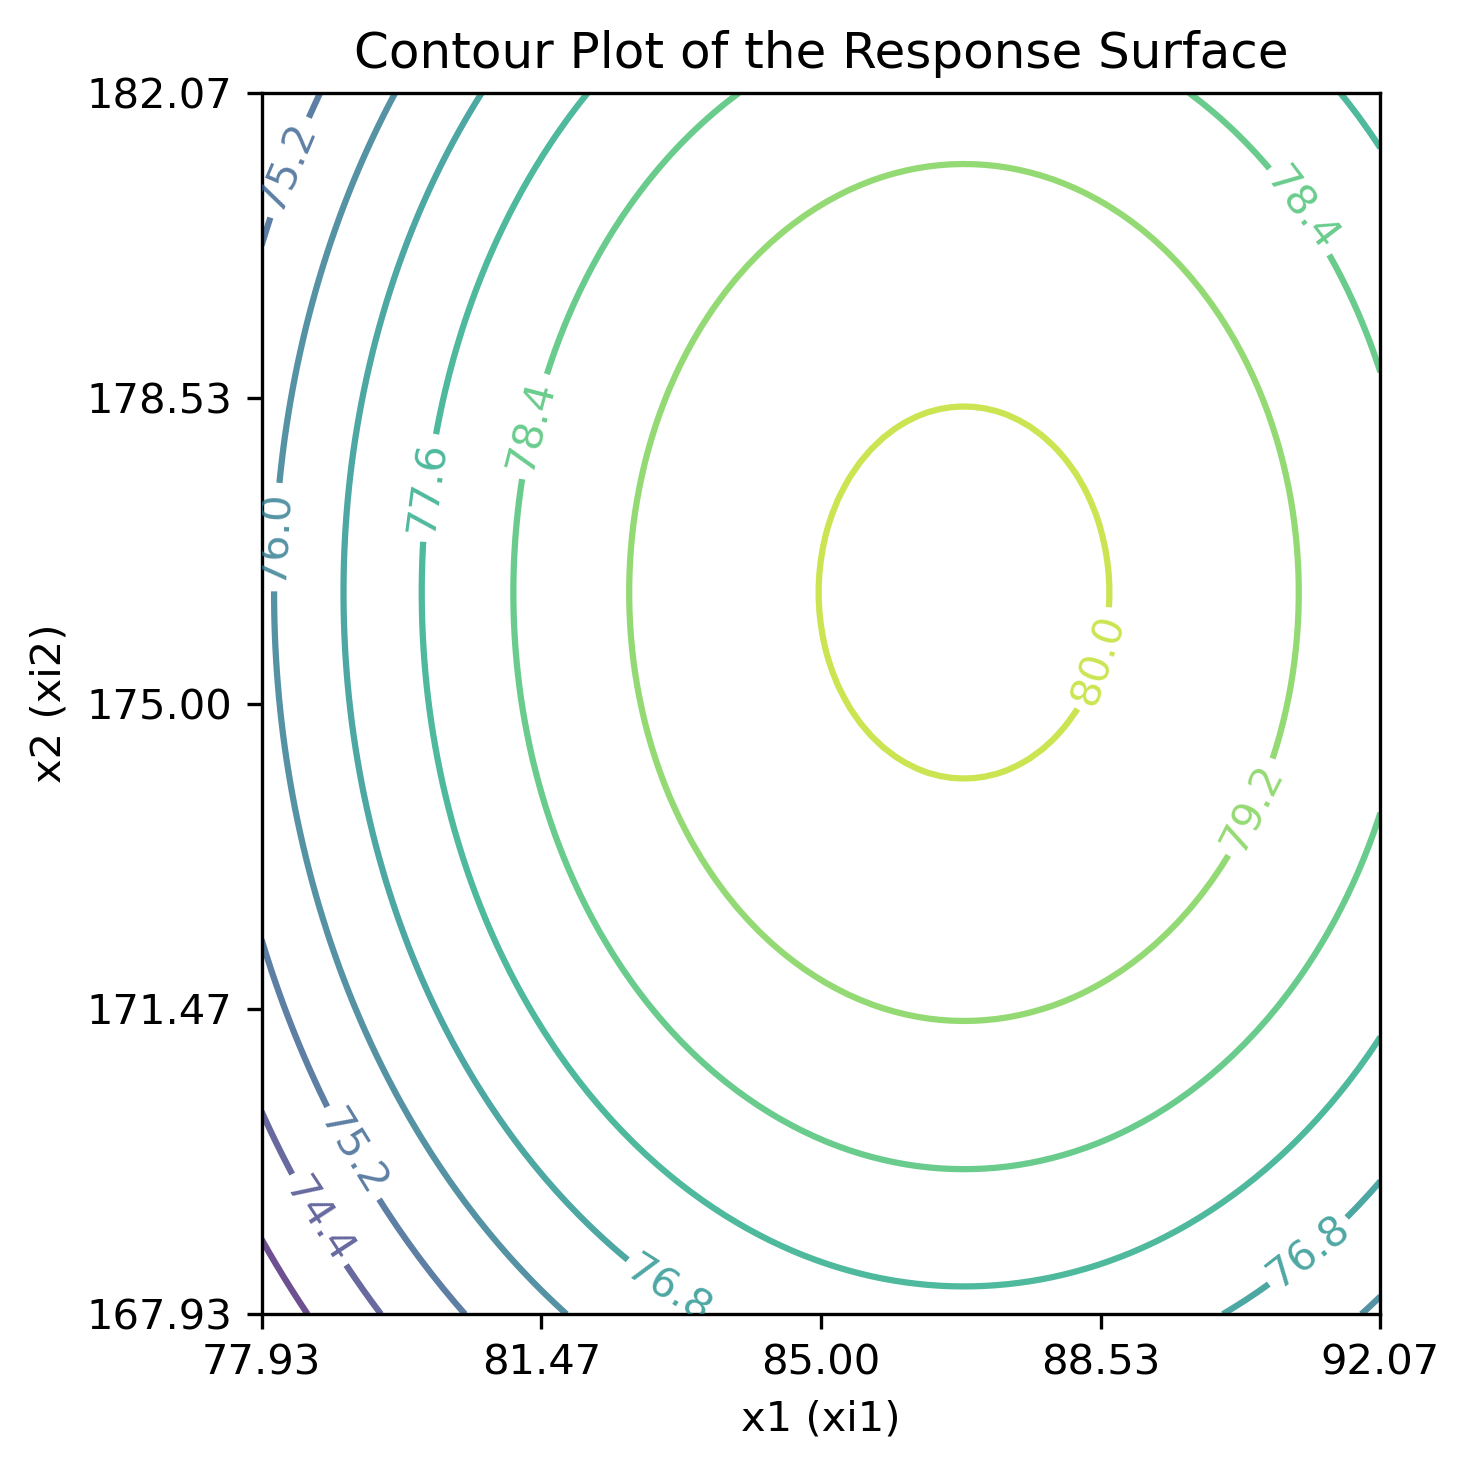

In [246]:
# Para el modelo de CO
from sklearn.preprocessing import MinMaxScaler
import itertools as it

# modelo
from copy import deepcopy
# Modificamos las variables para que pueda ser aplicado el modelo cuadratico
def cuadratic_model_variables(data_matrix, blocks = []):
    rows, columns = data_matrix.shape
    intercept = np.ones(rows)
    linear_terms = data_matrix
    squared_terms = data_matrix ** 2
    interaction_terms = []

    # Calculo de términos de interacción
    for i, j in combinations(range(columns), 2):
        interaction_terms.append(data_matrix[:, i] * data_matrix[:, j])

    if len(blocks) == 0:
        X = np.column_stack([intercept, linear_terms,  *interaction_terms,squared_terms,])
    else:
        X = np.column_stack([intercept, linear_terms, *interaction_terms, squared_terms, blocks])
    return X


def get_coded_funct(df, coded, real):

    coded_data = df[coded]
    real_data = df[real]
    relations = {i:j for i,j in zip(coded_data, real_data)}
    minus1 = relations[-1]
    plus1 = relations[1]
    def functr(x):
        return x * (plus1 - minus1)/2 + (plus1 + minus1)/2
    return functr

# Ignoramos el termino de bloque

# fig, ax = plt.subplots(1,3 ,figsize = (10, 5))
val_list = ['x1', 'x1']

### Forma para des-codificar los datos

codes = {
    'x1': get_coded_funct(df_respuesta, 'x1', 'xi1'),
    'x2': get_coded_funct(df_respuesta, 'x2', 'xi2'),
}

codification_names = {
    'x1': 'xi1',
    'x2': 'xi2',
}
# Generamos el modelo


model_res = ols('y ~ x1 + x2 + np.power(x1, 2) + np.power(x2,2)', data = df_respuesta).fit()

fig, ax = plt.subplots(1 ,figsize = (5, 5), dpi = 300)

# Graficamos

X, Y = np.meshgrid(np.linspace(df_respuesta['x1'].min(), df_respuesta['x1'].max(), 100),
                     np.linspace(df_respuesta['x2'].min(), df_respuesta['x2'].max(), 100))
Z = model_res.predict(exog = pd.DataFrame({'x1': X.ravel(), 'x2': Y.ravel()})).values.reshape(X.shape)

cs = ax.contour(X, Y, Z, levels=10, cmap='viridis', alpha=0.8)
ax.clabel(cs, fontsize=10)
xticks = np.linspace(df_respuesta['x1'].min(), df_respuesta['x1'].max(), 5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{codes['x1'](x):.2f}" for x in xticks])
yticks = np.linspace(df_respuesta['x2'].min(), df_respuesta['x2'].max(), 5)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{codes['x2'](y):.2f}" for y in yticks])
ax.set_xlabel('x1 (xi1)')
ax.set_ylabel('x2 (xi2)')
ax.set_title('Contour Plot of the Response Surface')
plt.tight_layout()
plt.show()


/var/folders/zv/p838yyl57rb2tlk802d5y2hh0000gn/T/ipykernel_57605/2175397120.py:79: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


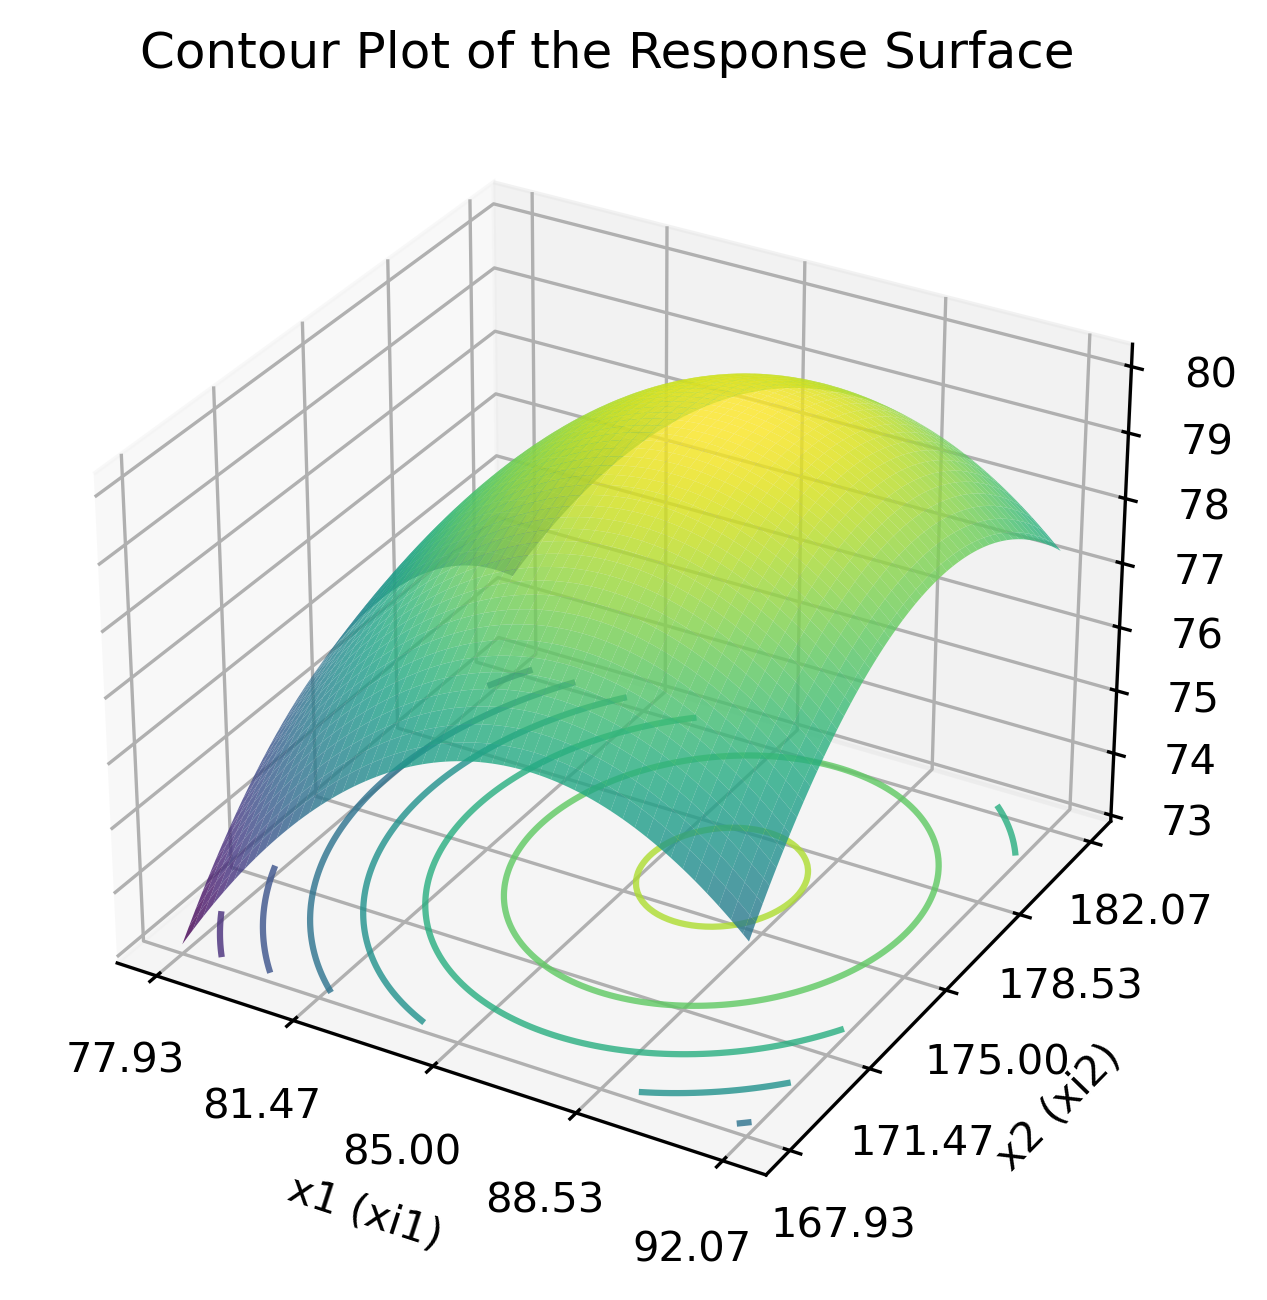

In [224]:
### Curva de respuesta
# Para el modelo de CO
from sklearn.preprocessing import MinMaxScaler
import itertools as it

# modelo
from copy import deepcopy
# Modificamos las variables para que pueda ser aplicado el modelo cuadratico
def cuadratic_model_variables(data_matrix, blocks = []):
    rows, columns = data_matrix.shape
    intercept = np.ones(rows)
    linear_terms = data_matrix
    squared_terms = data_matrix ** 2
    interaction_terms = []

    # Calculo de términos de interacción
    for i, j in combinations(range(columns), 2):
        interaction_terms.append(data_matrix[:, i] * data_matrix[:, j])

    if len(blocks) == 0:
        X = np.column_stack([intercept, linear_terms,  *interaction_terms,squared_terms,])
    else:
        X = np.column_stack([intercept, linear_terms, *interaction_terms, squared_terms, blocks])
    return X


def get_coded_funct(df, coded, real):

    coded_data = df[coded]
    real_data = df[real]
    relations = {i:j for i,j in zip(coded_data, real_data)}
    minus1 = relations[-1]
    plus1 = relations[1]
    def functr(x):
        return x * (plus1 - minus1)/2 + (plus1 + minus1)/2
    return functr

# Ignoramos el termino de bloque

# fig, ax = plt.subplots(1,3 ,figsize = (10, 5))
val_list = ['x1', 'x1']

### Forma para des-codificar los datos

codes = {
    'x1': get_coded_funct(df_respuesta, 'x1', 'xi1'),
    'x2': get_coded_funct(df_respuesta, 'x2', 'xi2'),
}

codification_names = {
    'x1': 'xi1',
    'x2': 'xi2',
}
# Generamos el modelo


model_res = ols('y ~ x1 + x2 + np.power(x1, 2) + np.power(x2,2)', data = df_respuesta).fit()

fig = plt.figure(figsize = (5, 5), dpi = 300)
ax = fig.add_subplot(111, projection='3d')
# Graficamos

X, Y = np.meshgrid(np.linspace(df_respuesta['x1'].min(), df_respuesta['x1'].max(), 100),
                     np.linspace(df_respuesta['x2'].min(), df_respuesta['x2'].max(), 100))
Z = model_res.predict(exog = pd.DataFrame({'x1': X.ravel(), 'x2': Y.ravel()})).values.reshape(X.shape)

cs = ax.contour(X, Y, Z, zdir = 'z', cmap='viridis', alpha=0.8, offset=np.min(Z))
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8,)

xticks = np.linspace(df_respuesta['x1'].min(), df_respuesta['x1'].max(), 5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{codes['x1'](x):.2f}" for x in xticks])
yticks = np.linspace(df_respuesta['x2'].min(), df_respuesta['x2'].max(), 5)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{codes['x2'](y):.2f}" for y in yticks])
ax.set_xlabel('x1 (xi1)')
ax.set_ylabel('x2 (xi2)')
ax.set_title('Contour Plot of the Response Surface')
plt.tight_layout()
plt.show()



## Um pouquinho da Otimização

Podemos ver que existe un máximo en esta curva, la cuál es posible encontrar por medio de algoritmos de optimización.

Optimization terminated successfully.
         Current function value: -80.186058
         Iterations: 56
         Function evaluations: 108


/var/folders/zv/p838yyl57rb2tlk802d5y2hh0000gn/T/ipykernel_57605/3941890527.py:103: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


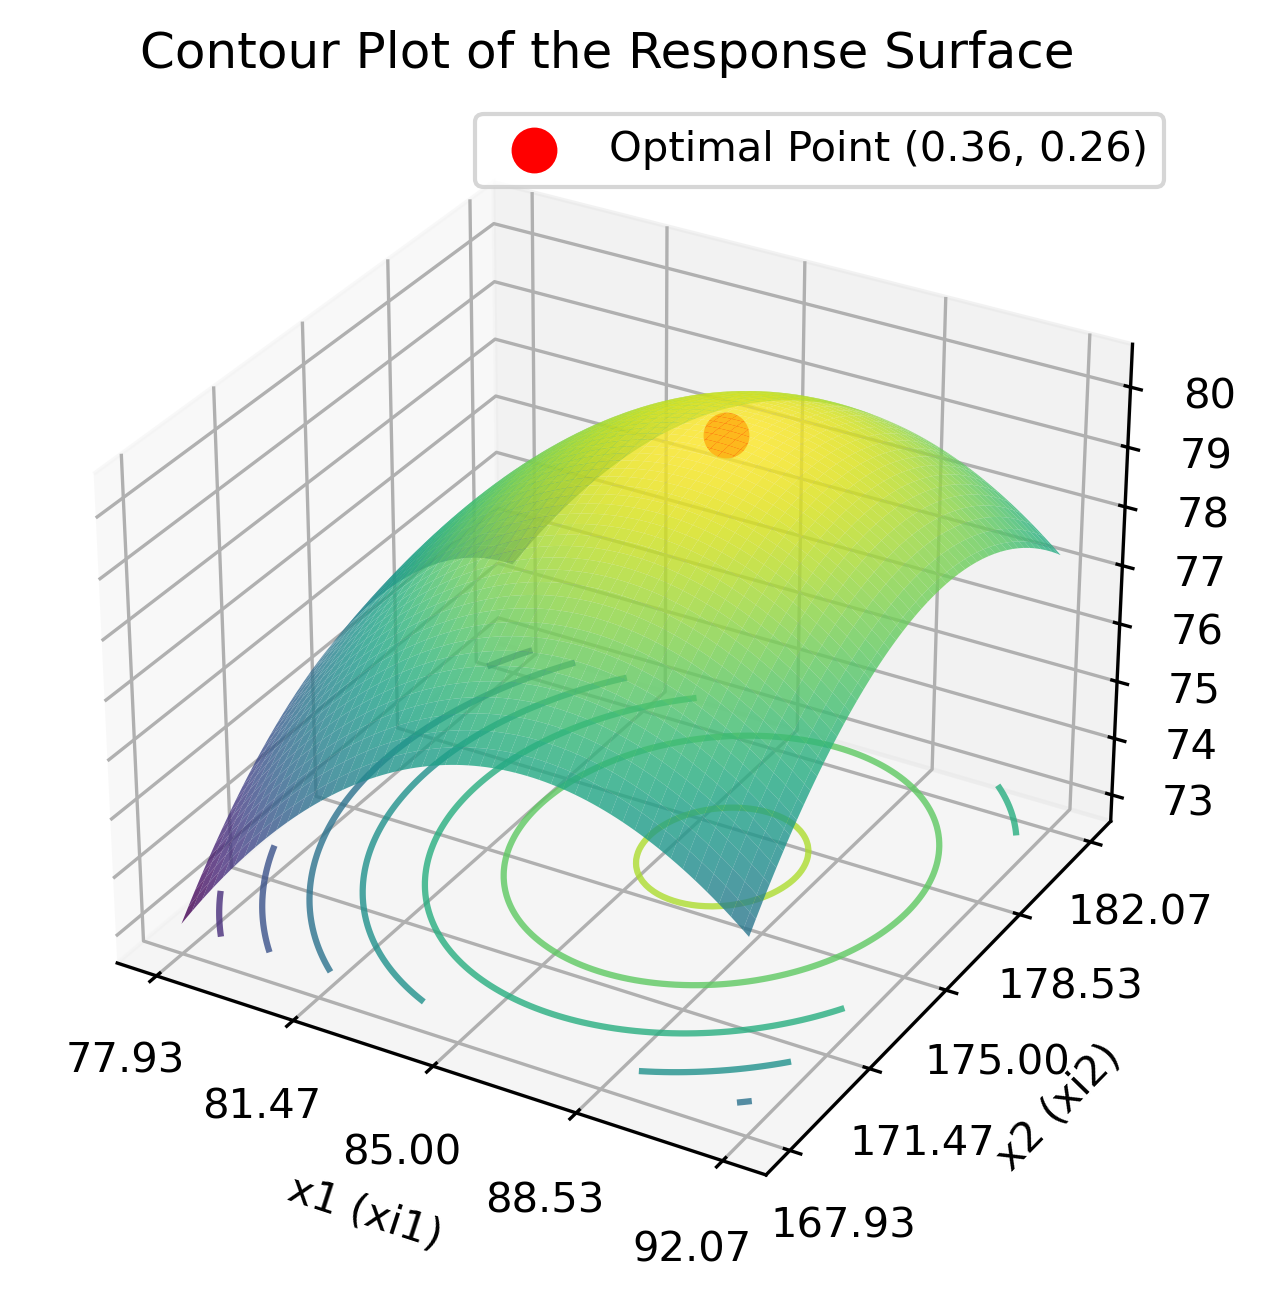

In [233]:
from scipy.optimize import minimize
def neg_response_surface_function(x, model):
    """
    Function to evaluate the response surface at given x values.
    x: array-like, shape (n_features,)
    model: fitted OLS model
    """
    x_dict = {name: val for name, val in zip(model.model.exog_names[1:], x)}
    return - model.predict(exog=pd.DataFrame([x_dict]))

def response_surface_function(x, model):
    """
    Function to evaluate the response surface at given x values.
    x: array-like, shape (n_features,)
    model: fitted OLS model
    """
    x_dict = {name: val for name, val in zip(model.model.exog_names[1:], x)}
    return model.predict(exog=pd.DataFrame([x_dict]))

res = minimize(
    fun=neg_response_surface_function,
    x0=[0, 0],  # Initial guess
    args=(model_res,),
    method='Nelder-Mead',
    options={'disp': True}
)

# graficamos el resultado en la superficie de respuesta


def cuadratic_model_variables(data_matrix, blocks = []):
    rows, columns = data_matrix.shape
    intercept = np.ones(rows)
    linear_terms = data_matrix
    squared_terms = data_matrix ** 2
    interaction_terms = []

    # Calculo de términos de interacción
    for i, j in combinations(range(columns), 2):
        interaction_terms.append(data_matrix[:, i] * data_matrix[:, j])

    if len(blocks) == 0:
        X = np.column_stack([intercept, linear_terms,  *interaction_terms,squared_terms,])
    else:
        X = np.column_stack([intercept, linear_terms, *interaction_terms, squared_terms, blocks])
    return X


def get_coded_funct(df, coded, real):

    coded_data = df[coded]
    real_data = df[real]
    relations = {i:j for i,j in zip(coded_data, real_data)}
    minus1 = relations[-1]
    plus1 = relations[1]
    def functr(x):
        return x * (plus1 - minus1)/2 + (plus1 + minus1)/2
    return functr

# Ignoramos el termino de bloque

# fig, ax = plt.subplots(1,3 ,figsize = (10, 5))
val_list = ['x1', 'x1']

### Forma para des-codificar los datos

codes = {
    'x1': get_coded_funct(df_respuesta, 'x1', 'xi1'),
    'x2': get_coded_funct(df_respuesta, 'x2', 'xi2'),
}

codification_names = {
    'x1': 'xi1',
    'x2': 'xi2',
}
# Generamos el modelo


model_res = ols('y ~ x1 + x2 + np.power(x1, 2) + np.power(x2,2)', data = df_respuesta).fit()

fig = plt.figure(figsize = (5, 5), dpi = 300)
ax = fig.add_subplot(111, projection='3d')
# Graficamos

X, Y = np.meshgrid(np.linspace(df_respuesta['x1'].min(), df_respuesta['x1'].max(), 100),
                     np.linspace(df_respuesta['x2'].min(), df_respuesta['x2'].max(), 100))
Z = model_res.predict(exog = pd.DataFrame({'x1': X.ravel(), 'x2': Y.ravel()})).values.reshape(X.shape)

cs = ax.contour(X, Y, Z, zdir = 'z', cmap='viridis', alpha=0.8, offset=np.min(Z))
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8,)

xticks = np.linspace(df_respuesta['x1'].min(), df_respuesta['x1'].max(), 5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{codes['x1'](x):.2f}" for x in xticks])
yticks = np.linspace(df_respuesta['x2'].min(), df_respuesta['x2'].max(), 5)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{codes['x2'](y):.2f}" for y in yticks])
ax.set_xlabel('x1 (xi1)')
ax.set_ylabel('x2 (xi2)')
ax.set_title('Contour Plot of the Response Surface')
ax.scatter(res.x[0], res.x[1], response_surface_function(res.x, model_res), color='red', s=100, label='Optimal Point (%.2f, %.2f)' % (res.x[0], res.x[1]))
ax.legend()
plt.tight_layout()
plt.show()

